# Тестирование Louvain алгоритма


Для тестирования алгоритма будем использовать библиотеку для работы с графами **NetworkX** и пакет **python-louvain**,
в котором реализован louvain алгоритм.

Библиотека **NetworkX** присутствует в пакетном менеджере **pip**, поэтому для установки достаточно набрать `pip install networkx`.

Для **python-louvain** аналогично: `pip install python-louvain`, но импортируется данный пакет под названием **community**


import community
import networkx as nx
import matplotlib.pyplot as plt

In [9]:
import networkx as nx
import community
import matplotlib.pyplot as plt

In [80]:
G = nx.karate_club_graph()

In [81]:
partition = community.best_partition(G)

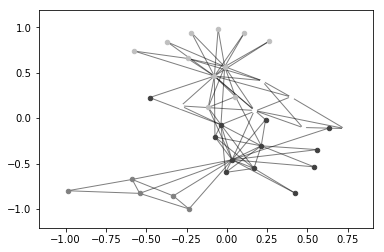

0.4188034188034188


In [82]:
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()
modularity = community.modularity(partition, G)
print(modularity)

In [59]:
l = 4
k = 20
Pin = 1
Pout = 0.0


In [60]:
E = nx.planted_partition_graph(l, k, Pin, Pout)

In [61]:
pl_partition = community.best_partition(E)

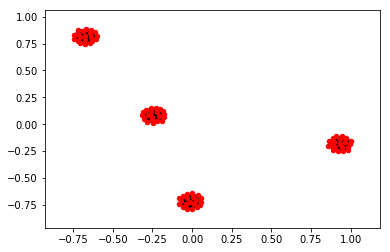

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 2, 41: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 2, 47: 2, 48: 2, 49: 2, 50: 2, 51: 2, 52: 2, 53: 2, 54: 2, 55: 2, 56: 2, 57: 2, 58: 2, 59: 2, 60: 3, 61: 3, 62: 3, 63: 3, 64: 3, 65: 3, 66: 3, 67: 3, 68: 3, 69: 3, 70: 3, 71: 3, 72: 3, 73: 3, 74: 3, 75: 3, 76: 3, 77: 3, 78: 3, 79: 3}
0.75


In [62]:
pos1 = nx.spring_layout(E)
nx.draw_networkx_nodes(E, pos1, node_size = 20)
nx.draw_networkx_edges(E,pos1, alpha=0.5)
plt.show()
print(pl_partition)
mod = community.modularity(pl_partition, E)
print(mod)

In [63]:
n = l * k
list_ = [ i // k for i in range(0,  n)]
print(list_)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


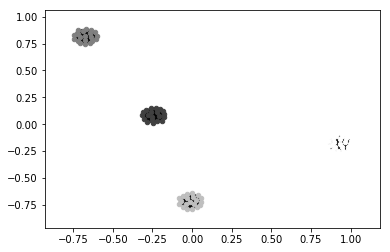

In [64]:
size = float(len(set(pl_partition.values())))
pos = nx.spring_layout(E)
count = 0.
for com in set(pl_partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in pl_partition.keys()
                                if pl_partition[nodes] == com]
    nx.draw_networkx_nodes(E, pos1, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(E, pos1, alpha=0.5)
plt.show()

In [67]:
cmp = []
for i in range(0,  n):
    if list_[i] == pl_partition[i]:
        cmp.append(1)
    else:
        cmp.append(0)
print(cmp)
percent_of_right_nodes = sum(cmp) / n
print(percent_of_right_nodes)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
1.0


In [94]:
l = 30
k = 5
Pin = 1
Pout = 0.0

In [95]:
E = nx.planted_partition_graph(l, k, Pin, Pout)

In [96]:
for i in range(4, 148, 5):
    E.add_edge(i, i + 1)
    print(i, i+1)
E.add_edge(149, 0)

4 5
9 10
14 15
19 20
24 25
29 30
34 35
39 40
44 45
49 50
54 55
59 60
64 65
69 70
74 75
79 80
84 85
89 90
94 95
99 100
104 105
109 110
114 115
119 120
124 125
129 130
134 135
139 140
144 145


In [97]:
pl_partition = community.best_partition(E)

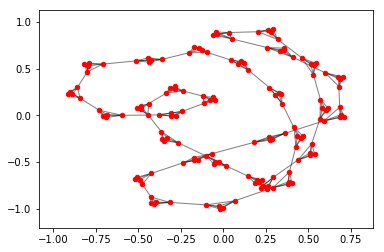

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 2, 21: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2, 30: 3, 31: 3, 32: 3, 33: 3, 34: 3, 35: 4, 36: 4, 37: 4, 38: 4, 39: 4, 40: 4, 41: 4, 42: 4, 43: 4, 44: 4, 45: 5, 46: 5, 47: 5, 48: 5, 49: 5, 50: 5, 51: 5, 52: 5, 53: 5, 54: 5, 55: 6, 56: 6, 57: 6, 58: 6, 59: 6, 60: 6, 61: 6, 62: 6, 63: 6, 64: 6, 65: 7, 66: 7, 67: 7, 68: 7, 69: 7, 70: 7, 71: 7, 72: 7, 73: 7, 74: 7, 75: 8, 76: 8, 77: 8, 78: 8, 79: 8, 80: 8, 81: 8, 82: 8, 83: 8, 84: 8, 85: 9, 86: 9, 87: 9, 88: 9, 89: 9, 90: 9, 91: 9, 92: 9, 93: 9, 94: 9, 95: 10, 96: 10, 97: 10, 98: 10, 99: 10, 100: 10, 101: 10, 102: 10, 103: 10, 104: 10, 105: 11, 106: 11, 107: 11, 108: 11, 109: 11, 110: 11, 111: 11, 112: 11, 113: 11, 114: 11, 115: 12, 116: 12, 117: 12, 118: 12, 119: 12, 120: 12, 121: 12, 122: 12, 123: 12, 124: 12, 125: 13, 126: 13, 127: 13, 128: 13, 129: 13, 130: 13, 131: 13, 132: 13, 133: 13

In [98]:
pos1 = nx.spring_layout(E)
nx.draw_networkx_nodes(E, pos1, node_size = 20)
nx.draw_networkx_edges(E,pos1, alpha=0.5)
plt.show()
print(pl_partition)
mod = community.modularity(pl_partition, E)
print(mod)

In [99]:
print(E.edges)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 149), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (4, 5), (5, 8), (5, 9), (5, 6), (5, 7), (6, 8), (6, 9), (6, 7), (7, 8), (7, 9), (8, 9), (9, 10), (10, 11), (10, 12), (10, 13), (10, 14), (11, 12), (11, 13), (11, 14), (12, 13), (12, 14), (13, 14), (14, 15), (15, 16), (15, 17), (15, 18), (15, 19), (16, 17), (16, 18), (16, 19), (17, 18), (17, 19), (18, 19), (19, 20), (20, 24), (20, 21), (20, 22), (20, 23), (21, 24), (21, 22), (21, 23), (22, 24), (22, 23), (23, 24), (24, 25), (25, 26), (25, 27), (25, 28), (25, 29), (26, 27), (26, 28), (26, 29), (27, 28), (27, 29), (28, 29), (29, 30), (30, 32), (30, 33), (30, 34), (30, 31), (31, 32), (31, 33), (31, 34), (32, 33), (32, 34), (33, 34), (34, 35), (35, 36), (35, 37), (35, 38), (35, 39), (36, 37), (36, 38), (36, 39), (37, 38), (37, 39), (38, 39), (39, 40), (40, 41), (40, 42), (40, 43), (40, 44), (41, 42), (41, 43), (41, 44), (42, 43), (42, 44), (43, 44), (44, 45), (45, 48), (45, 49), (45, 46), (45, 47), (4

In [110]:
import numpy as np
rand = np.random.permutation(l * k)
R = nx.Graph()
R.add_nodes_from(rand)
edgess = []
for ed in E.edges:
    if (rand[ed[0]], rand[ed[1]]) not in R.edges:
        R.add_edge(rand[ed[0]], rand[ed[1]])
print(R.edges)

[(0, 64), (0, 34), (0, 132), (0, 46), (1, 58), (1, 31), (1, 69), (1, 55), (2, 73), (2, 146), (2, 77), (2, 94), (3, 138), (3, 83), (3, 100), (3, 5), (4, 48), (4, 147), (4, 6), (4, 119), (5, 83), (5, 138), (5, 100), (6, 48), (6, 20), (6, 147), (6, 119), (7, 96), (7, 131), (7, 20), (7, 71), (8, 57), (8, 60), (8, 13), (8, 41), (9, 82), (9, 122), (9, 29), (9, 93), (9, 111), (10, 11), (10, 37), (10, 62), (10, 23), (11, 37), (11, 62), (11, 23), (12, 144), (12, 40), (12, 117), (12, 120), (12, 105), (13, 57), (13, 60), (13, 65), (13, 41), (14, 129), (14, 123), (14, 53), (14, 93), (15, 130), (15, 35), (15, 90), (15, 142), (15, 143), (16, 50), (16, 78), (16, 126), (16, 47), (17, 106), (17, 135), (17, 101), (17, 133), (18, 49), (18, 43), (18, 148), (18, 21), (19, 92), (19, 28), (19, 76), (19, 142), (19, 127), (20, 96), (20, 71), (20, 131), (21, 49), (21, 43), (21, 148), (22, 26), (22, 108), (22, 74), (22, 39), (23, 109), (23, 62), (23, 37), (24, 66), (24, 107), (24, 44), (24, 98), (25, 89), (25, 4

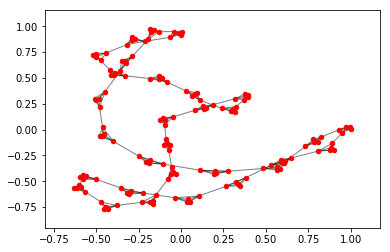

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7, 10: 8, 11: 8, 12: 9, 13: 6, 14: 10, 15: 0, 16: 11, 17: 12, 18: 13, 19: 14, 20: 5, 21: 13, 22: 10, 23: 8, 24: 1, 25: 15, 26: 10, 27: 4, 28: 14, 29: 7, 30: 12, 31: 1, 32: 3, 33: 5, 34: 0, 35: 0, 36: 5, 37: 8, 38: 12, 39: 10, 40: 9, 41: 6, 42: 15, 43: 13, 44: 1, 45: 5, 46: 0, 47: 11, 48: 4, 49: 13, 50: 11, 51: 8, 52: 6, 53: 10, 54: 3, 55: 1, 56: 8, 57: 6, 58: 1, 59: 7, 60: 6, 61: 4, 62: 8, 63: 2, 64: 0, 65: 6, 66: 1, 67: 9, 68: 11, 69: 1, 70: 4, 71: 5, 72: 6, 73: 2, 74: 10, 75: 3, 76: 14, 77: 2, 78: 11, 79: 9, 80: 8, 81: 6, 82: 7, 83: 3, 84: 7, 85: 16, 86: 2, 87: 11, 88: 12, 89: 15, 90: 0, 91: 7, 92: 14, 93: 10, 94: 2, 95: 2, 96: 5, 97: 5, 98: 1, 99: 2, 100: 3, 101: 12, 102: 6, 103: 15, 104: 4, 105: 9, 106: 12, 107: 1, 108: 10, 109: 9, 110: 12, 111: 7, 112: 5, 113: 7, 114: 16, 115: 4, 116: 11, 117: 9, 118: 16, 119: 4, 120: 9, 121: 8, 122: 7, 123: 10, 124: 3, 125: 2, 126: 11, 127: 11, 128: 3, 129: 10, 130: 0, 131: 5, 132: 0, 133:

In [111]:
pl_partition = community.best_partition(R)

pos1 = nx.spring_layout(R)
nx.draw_networkx_nodes(R, pos1, node_size = 20)
nx.draw_networkx_edges(R,pos1, alpha=0.5)
plt.show()
print(pl_partition)
mod = community.modularity(pl_partition, R)
print(mod)